In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"D:\Imarticus\Machine Learning\Quikr Price Prediction.csv")
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:
df.shape

(892, 6)

In [4]:
df.dtypes

name          object
company       object
year          object
Price         object
kms_driven    object
fuel_type     object
dtype: object

In [5]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [6]:
df.duplicated().sum()

94

In [7]:
df=df.drop_duplicates(keep='first')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    50
fuel_type     53
dtype: int64

In [10]:
for i in df.columns:
    print('\n',i,'\n')
    print(df[i].unique(),'\n')
    print(f'{i}--->{df[i].nunique()}\n\n')


 name 

['Hyundai Santro Xing XO eRLX Euro III' 'Mahindra Jeep CL550 MDI'
 'Maruti Suzuki Alto 800 Vxi' 'Hyundai Grand i10 Magna 1.2 Kappa VTVT'
 'Ford EcoSport Titanium 1.5L TDCi' 'Ford Figo' 'Hyundai Eon'
 'Ford EcoSport Ambiente 1.5L TDCi' 'Maruti Suzuki Alto K10 VXi AMT'
 'Skoda Fabia Classic 1.2 MPI' 'Maruti Suzuki Stingray VXi'
 'Hyundai Elite i20 Magna 1.2' 'Mahindra Scorpio SLE BS IV' 'Audi A8'
 'Audi Q7' 'Mahindra Scorpio S10' 'Maruti Suzuki Alto 800'
 'Hyundai i20 Sportz 1.2' 'Maruti Suzuki Alto 800 Lx'
 'Maruti Suzuki Vitara Brezza ZDi' 'Maruti Suzuki Alto LX'
 'Mahindra Bolero DI' 'Maruti Suzuki Swift Dzire ZDi'
 'Mahindra Scorpio S10 4WD' 'Maruti Suzuki Swift Vdi BSIII'
 'Maruti Suzuki Wagon R VXi BS III' 'Maruti Suzuki Wagon R VXi Minor'
 'Toyota Innova 2.0 G 8 STR BS IV' 'Renault Lodgy 85 PS RXL'
 'Skoda Yeti Ambition 2.0 TDI CR 4x2' 'Maruti Suzuki Baleno Delta 1.2'
 'Renault Duster 110 PS RxZ Diesel Plus' 'Renault Duster 85 PS RxE Diesel'
 'Honda City 1.5 S MT' 'Maruti

In [11]:

df = df[df.year.str.isnumeric()]
df['year']=df.year.astype(int)

In [12]:
df.year.unique()

array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

In [13]:
df.shape

(749, 6)

In [14]:
df.dtypes

name          object
company       object
year           int32
Price         object
kms_driven    object
fuel_type     object
dtype: object

In [15]:
df.Price.unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [16]:
df[df.Price=='Ask For Price'].shape

(22, 6)

In [17]:
df['Price']=df.Price.replace('Ask For Price',np.nan)

In [18]:
df.Price.isnull().sum()

22

In [19]:
prediction_data=df[df.Price.isnull()].index

In [20]:
prediction_data

Int64Index([  2,   5,  69, 138, 295, 304, 388, 449, 503, 511, 524, 567, 613,
            619, 634, 763, 822, 826, 848, 854, 859, 882],
           dtype='int64')

In [21]:
df=df.drop(prediction_data)

In [22]:
df.Price.isnull().sum()

0

In [23]:
df.shape

(727, 6)

In [24]:
df.Price=df.Price.str.replace(',','').astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        727 non-null    object
 1   company     727 non-null    object
 2   year        727 non-null    int32 
 3   Price       727 non-null    int32 
 4   kms_driven  727 non-null    object
 5   fuel_type   724 non-null    object
dtypes: int32(2), object(4)
memory usage: 34.1+ KB


In [26]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,"28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,"36,000 kms",Diesel
6,Ford Figo,Ford,2012,175000,"41,000 kms",Diesel


In [27]:
df['kms_driven']=df.kms_driven.str.replace('kms','')

In [28]:
df['kms_driven']=df.kms_driven.str.replace(',','')

In [29]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [30]:
df['kms_driven'].unique()

array(['45000 ', '40 ', '28000 ', '36000 ', '41000 ', '25000 ', '24530 ',
       '60000 ', '30000 ', '32000 ', '48660 ', '4000 ', '16934 ',
       '43000 ', '35550 ', '39522 ', '39000 ', '55000 ', '72000 ',
       '15975 ', '70000 ', '23452 ', '35522 ', '48508 ', '15487 ',
       '82000 ', '20000 ', '68000 ', '38000 ', '27000 ', '33000 ',
       '46000 ', '16000 ', '47000 ', '35000 ', '30874 ', '15000 ',
       '29685 ', '130000 ', '19000 ', '54000 ', '13000 ', '38200 ',
       '22000 ', '50000 ', '13500 ', '3600 ', '45863 ', '60500 ',
       '12500 ', '18000 ', '13349 ', '29000 ', '44000 ', '42000 ',
       '14000 ', '49000 ', '36200 ', '51000 ', '104000 ', '33333 ',
       '33600 ', '5600 ', '7500 ', '26000 ', '24330 ', '65480 ',
       '200000 ', '59000 ', '99000 ', '2800 ', '21000 ', '11000 ',
       '66000 ', '3000 ', '7000 ', '38500 ', '37200 ', '43200 ', '24800 ',
       '45872 ', '40000 ', '11400 ', '97200 ', '52000 ', '31000 ',
       '175430 ', '37000 ', '65000 ', '3350 ', '7

In [31]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [32]:
df['kms_driven']=df.kms_driven.replace('Petrol',np.nan)

In [33]:
df['kms_driven'].isnull().sum()

2

In [34]:
km_null=df[df['kms_driven'].isnull()].index

In [35]:
df=df.drop(km_null)

In [36]:
df['kms_driven'].isnull().sum()

0

In [37]:
df['kms_driven']=df['kms_driven'].astype(int)

In [38]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [39]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [40]:
fuel_null=df[df['fuel_type'].isnull()].index
fuel_null

Int64Index([132], dtype='int64')

In [41]:
df['fuel_type'].value_counts()

Petrol    390
Diesel    332
LPG         2
Name: fuel_type, dtype: int64

In [42]:
df.shape

(725, 6)

In [43]:
df=df.drop(132)

In [44]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [45]:
df.shape

(724, 6)

In [46]:
df = df.reset_index(drop=True)

<Axes: >

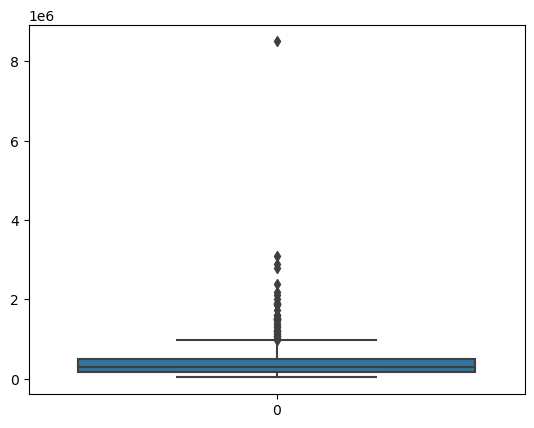

In [47]:
sns.boxplot(df.Price)

In [48]:
df[df.Price > 6000000]

,name,company,year,Price,kms_driven,fuel_type
447,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [49]:
df.Price[df.Price > 6000000] = 850000

<Axes: >

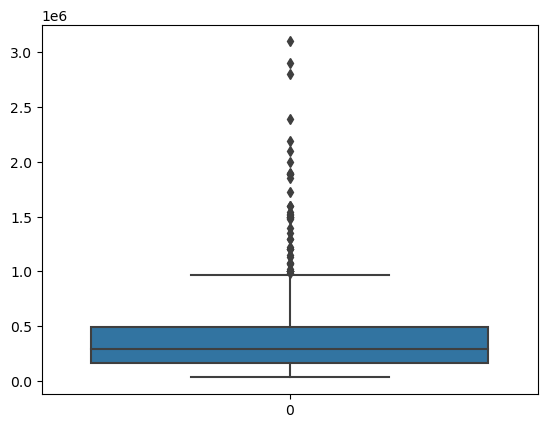

In [50]:
sns.boxplot(df.Price)

<Axes: >

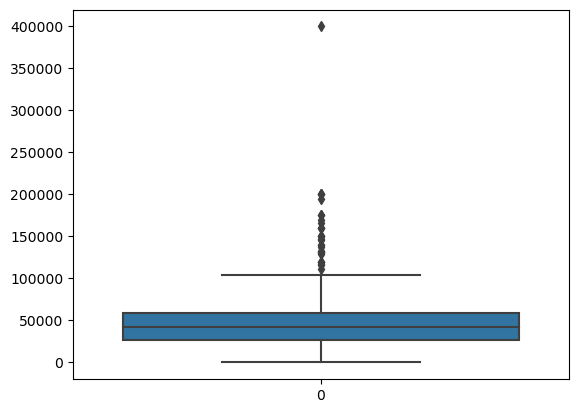

In [51]:
sns.boxplot(df.kms_driven)

In [52]:
df[df.kms_driven > 350000]

,name,company,year,Price,kms_driven,fuel_type
280,Honda City 1.5 V MT Exclusive,Honda,2010,240000,400000,Petrol


In [53]:
df.kms_driven[df.kms_driven == 400000] = 40000

<Axes: >

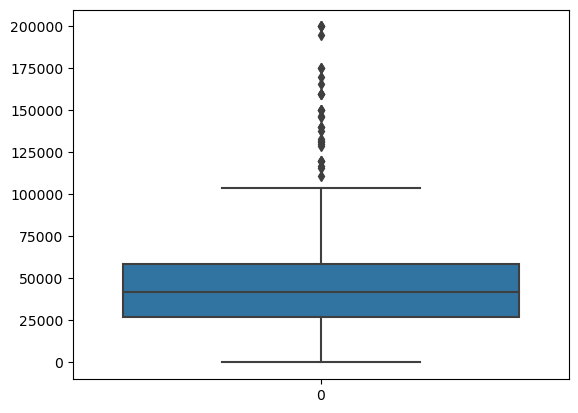

In [54]:
sns.boxplot(df.kms_driven)

In [55]:
for i in df.columns:
    print(i)
    print(df[i].unique())

name
['Hyundai Santro Xing XO eRLX Euro III' 'Mahindra Jeep CL550 MDI'
 'Hyundai Grand i10 Magna 1.2 Kappa VTVT'
 'Ford EcoSport Titanium 1.5L TDCi' 'Ford Figo' 'Hyundai Eon'
 'Ford EcoSport Ambiente 1.5L TDCi' 'Maruti Suzuki Alto K10 VXi AMT'
 'Skoda Fabia Classic 1.2 MPI' 'Maruti Suzuki Stingray VXi'
 'Hyundai Elite i20 Magna 1.2' 'Mahindra Scorpio SLE BS IV' 'Audi A8'
 'Audi Q7' 'Mahindra Scorpio S10' 'Maruti Suzuki Alto 800'
 'Maruti Suzuki Alto 800 Vxi' 'Hyundai i20 Sportz 1.2'
 'Maruti Suzuki Alto 800 Lx' 'Maruti Suzuki Vitara Brezza ZDi'
 'Maruti Suzuki Alto LX' 'Mahindra Bolero DI'
 'Maruti Suzuki Swift Dzire ZDi' 'Mahindra Scorpio S10 4WD'
 'Maruti Suzuki Swift Vdi BSIII' 'Maruti Suzuki Wagon R VXi BS III'
 'Maruti Suzuki Wagon R VXi Minor' 'Toyota Innova 2.0 G 8 STR BS IV'
 'Renault Lodgy 85 PS RXL' 'Skoda Yeti Ambition 2.0 TDI CR 4x2'
 'Maruti Suzuki Baleno Delta 1.2' 'Renault Duster 110 PS RxZ Diesel Plus'
 'Renault Duster 85 PS RxE Diesel' 'Honda City 1.5 S MT'
 'Maruti Su

<Axes: >

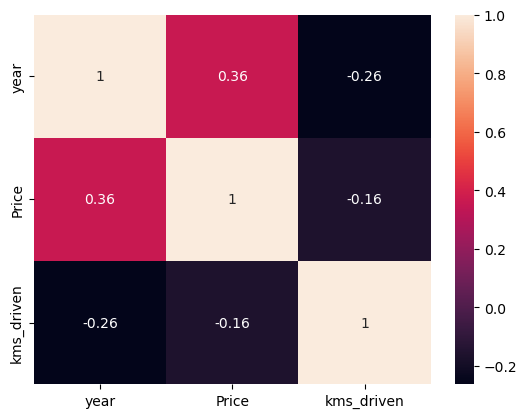

In [60]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

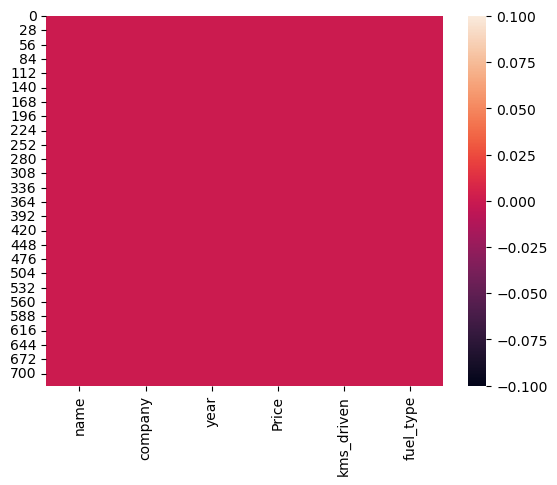

In [61]:
sns.heatmap(df.isnull())